In [1]:
import pickle
import matplotlib.pyplot as plt

# import mod_kernik as kernik

#############################################
from scipy.integrate import ode, solve_ivp
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import bisect

sys.path.append('../')
sys.path.append('../Protocols')
sys.path.append('../Lib')
sys.path.append('../Models')
import simulator_scipy
import simulator_myokit
import model_response
from br1977 import BR1977
from ord2011 import ORD2011
import mod_kernik as kernik

import mod_trace as trace

import myokit

In [2]:
def get_high_fitness(ga_result):
    best_individual = ga_result.generations[0][0]

    for i, gen in enumerate(ga_result.generations):
        best_in_gen = ga_result.get_high_fitness_individual(i)
        if best_in_gen.fitness > best_individual.fitness:            
            best_individual = best_in_gen

    return best_individual

In [3]:
ga_result = 0
def plot_current_conributions(trial_conditions, prestep=2000, window=10, step_size=5, with_artefact=False):    
    model_name = trial_conditions.split('_')[0]
    currents = ['I_Na', 'I_Kr', 'I_Ks', 'I_To', 'I_CaL', 'I_K1', 'I_NaL' ]   
    if model_name=='BR1977':
        currents = ['I_Na', 'I_si', 'I_K1', 'I_x1']
    elif model_name=='Kernik':
        currents = ['I_Na', 'I_Kr', 'I_Ks', 'I_To', 'I_F', 'I_CaL', 'I_K1']

    for i, current in enumerate(currents):
        ga_result = pickle.load(open(f'ga_results/{trial_conditions}/ga_results_{current}_a{with_artefact}', 'rb'))
                
        best_individual = get_high_fitness(ga_result)
        protocol = best_individual.protocol
        print(protocol)
                
        tr = None
        if model_name=='ORD2011' :
            model = ORD2011(protocol)
            tr = model_response.get_model_response_JK(model, protocol, prestep=prestep)
        elif model_name=='OHara2017':
            model = '../mmt-model-files/ohara-cipa-v1-2017_VC.mmt'
            tr = model_response.get_model_response_with_myokit(model, protocol, prestep=prestep)
        elif model_name=='BR1977' :
            model = BR1977(protocol)  
            tr = model_response.get_model_response_JK(model, protocol, prestep=prestep)
        elif model_name=='Kernik':
            k = kernik.KernikModel(is_exp_artefact=True)        
            tr = k.generate_response(protocol, is_no_ion_selective=False)
               
        tr.plot_currents_contribution(current,  window=window, step_size=step_size, is_shown=True, title=current,
                saved_to=f'./ga_results/{trial_conditions}/{current}.svg')
        
        print(tr.current_response_info.get_max_current_contributions(tr.t, window=window, step_size=step_size))
        print('-'*100)

|RAMP: Voltage Start: -32.03770765919879, Voltage End: -106.80860278819652, Duration: 359.2367186322397| + |RAMP: Voltage Start: -48.70249129935763, Voltage End: 9.159991965711157, Duration: 34.85846015374853| + |RAMP: Voltage Start: -18.522110323557968, Voltage End: -116.8803291916549, Duration: 270.6396617253719| + |RAMP: Voltage Start: -49.09923986850803, Voltage End: 10.033513510894174, Duration: 38.26830937845424|


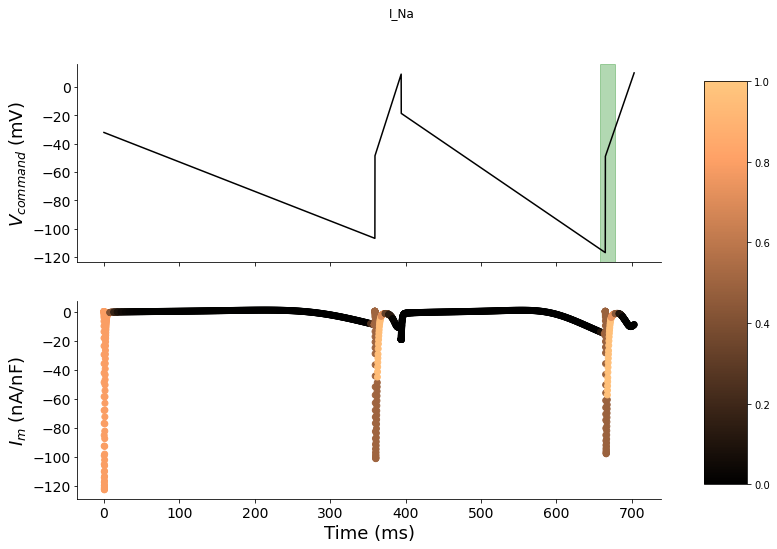

      Current  Contribution  Time Start  Time End
0        I_Na      0.963648       665.0     675.0
1       I_NaL      0.263846        15.0      25.0
2        I_To      0.020711        10.0      20.0
3       I_CaL      0.837397       385.0     395.0
4      I_CaNa      0.079953       690.0     700.0
5       I_CaK      0.022281       690.0     700.0
6        I_Kr      0.015946       455.0     465.0
7        I_Ks      0.000530       435.0     445.0
8        I_K1      0.983755       650.0     660.0
9      I_NaCa      0.222068       580.0     590.0
10  I_NaCa_ss      0.257162       400.0     410.0
11      I_NaK      0.309822       260.0     270.0
12       I_Kb      0.018273       400.0     410.0
13      I_Nab      0.062413       265.0     275.0
14      I_Cab      0.070505       265.0     275.0
15      I_pCa      0.000271       580.0     590.0
----------------------------------------------------------------------------------------------------
|RAMP: Voltage Start: -76.6650266433978, Voltage 

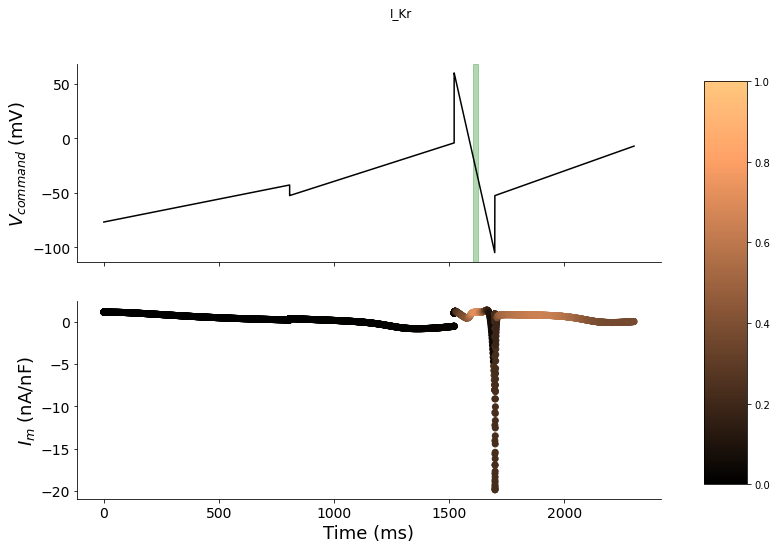

      Current  Contribution  Time Start  Time End
0        I_Na      0.630899      1700.0    1710.0
1       I_NaL      0.023517       795.0     805.0
2        I_To      0.061561      1525.0    1535.0
3       I_CaL      0.631085      1350.0    1360.0
4      I_CaNa      0.053680      1460.0    1470.0
5       I_CaK      0.072122      1525.0    1535.0
6        I_Kr      0.721641      1610.0    1620.0
7        I_Ks      0.037862      1540.0    1550.0
8        I_K1      0.879696      1685.0    1695.0
9      I_NaCa      0.171145      1515.0    1525.0
10  I_NaCa_ss      0.157749      1105.0    1115.0
11      I_NaK      0.321709       995.0    1005.0
12       I_Kb      0.304461      1520.0    1530.0
13      I_Nab      0.028161       950.0     960.0
14      I_Cab      0.028666      1675.0    1685.0
15      I_pCa      0.000202      1020.0    1030.0
----------------------------------------------------------------------------------------------------
|STEP: Voltage: 60.7007530113885, Duration: 994.2

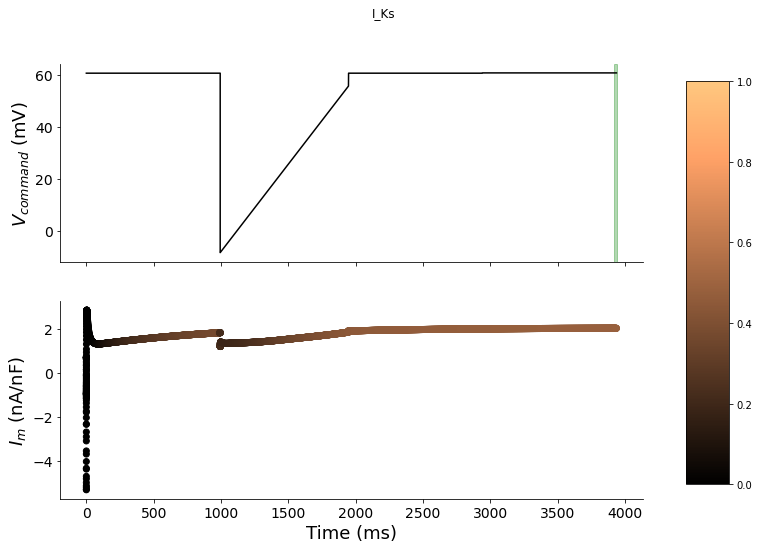

      Current  Contribution  Time Start  Time End
0        I_Na      0.305134         0.0      10.0
1       I_NaL      0.013617        65.0      75.0
2        I_To      0.199077         5.0      15.0
3       I_CaL      0.155135         5.0      15.0
4      I_CaNa      0.064921        10.0      20.0
5       I_CaK      0.359664        10.0      20.0
6        I_Kr      0.581941      1000.0    1010.0
7        I_Ks      0.480542      3925.0    3935.0
8        I_K1      0.003668       995.0    1005.0
9      I_NaCa      0.142641       250.0     260.0
10  I_NaCa_ss      0.047541       235.0     245.0
11      I_NaK      0.125820       295.0     305.0
12       I_Kb      0.258863       305.0     315.0
13      I_Nab      0.003060       995.0    1005.0
14      I_Cab      0.002131       995.0    1005.0
15      I_pCa      0.000080       255.0     265.0
----------------------------------------------------------------------------------------------------
|STEP: Voltage: 59.47121208277275, Duration: 844.

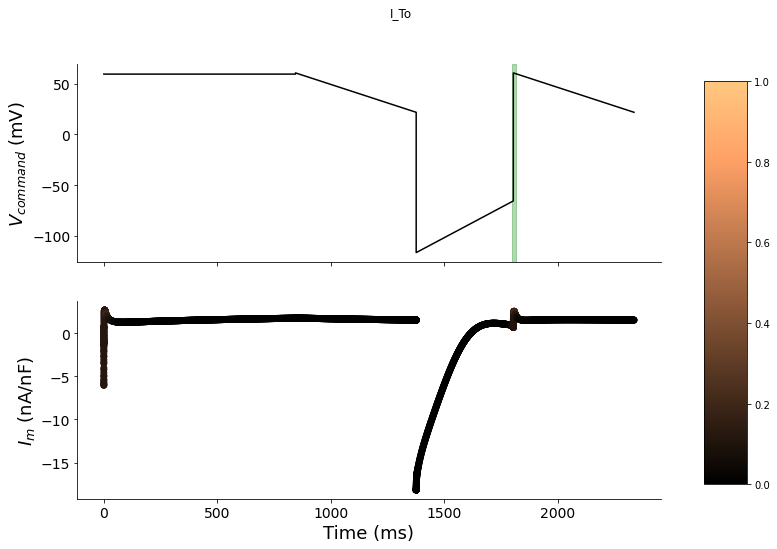

      Current  Contribution  Time Start  Time End
0        I_Na      0.306041         0.0      10.0
1       I_NaL      0.018975      1900.0    1910.0
2        I_To      0.197245      1805.0    1815.0
3       I_CaL      0.176411      1805.0    1815.0
4      I_CaNa      0.070812      1815.0    1825.0
5       I_CaK      0.365361      1810.0    1820.0
6        I_Kr      0.402161      2325.0    2335.0
7        I_Ks      0.371507      1070.0    1080.0
8        I_K1      0.960498      1440.0    1450.0
9      I_NaCa      0.201011      1610.0    1620.0
10  I_NaCa_ss      0.050126      1610.0    1620.0
11      I_NaK      0.317934      1610.0    1620.0
12       I_Kb      0.257174       305.0     315.0
13      I_Nab      0.067434      1610.0    1620.0
14      I_Cab      0.076154      1610.0    1620.0
15      I_pCa      0.000358      1610.0    1620.0
----------------------------------------------------------------------------------------------------
|STEP: Voltage: -29.57934760572107, Duration: 905

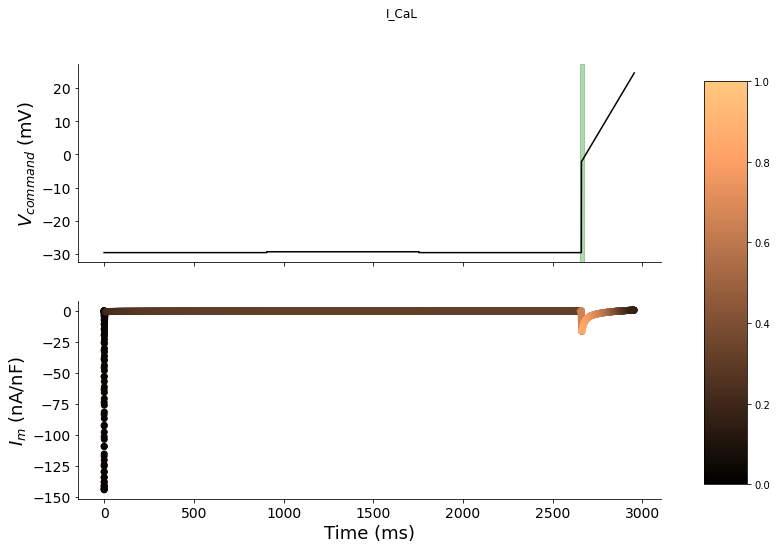

      Current  Contribution  Time Start  Time End
0        I_Na      0.779607         0.0      10.0
1       I_NaL      0.228737        15.0      25.0
2        I_To      0.021749         5.0      15.0
3       I_CaL      0.861875      2660.0    2670.0
4      I_CaNa      0.085031      2660.0    2670.0
5       I_CaK      0.033575      2815.0    2825.0
6        I_Kr      0.362529      2940.0    2950.0
7        I_Ks      0.106595      2940.0    2950.0
8        I_K1      0.094309      2645.0    2655.0
9      I_NaCa      0.115580       570.0     580.0
10  I_NaCa_ss      0.199658        25.0      35.0
11      I_NaK      0.236949      2645.0    2655.0
12       I_Kb      0.164389      2940.0    2950.0
13      I_Nab      0.016195      2645.0    2655.0
14      I_Cab      0.014470      2645.0    2655.0
15      I_pCa      0.000197       780.0     790.0
----------------------------------------------------------------------------------------------------
|STEP: Voltage: -69.35549870638431, Duration: 962

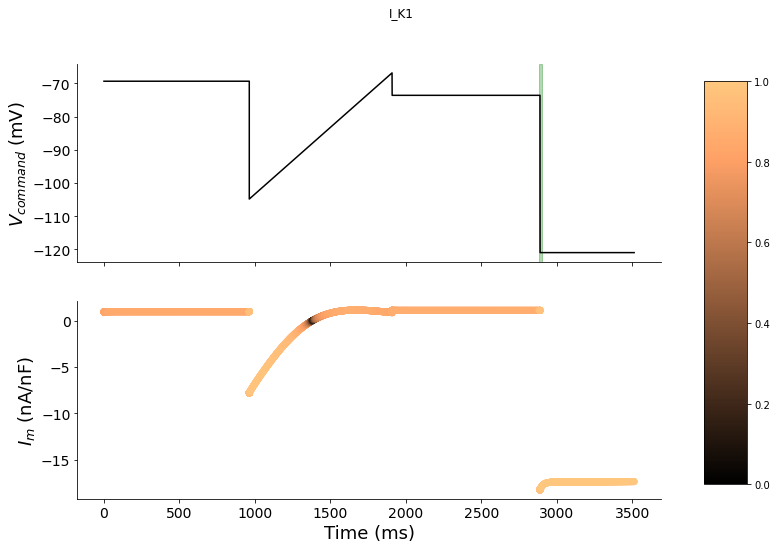

      Current  Contribution  Time Start  Time End
0        I_Na  4.054810e-02         0.0      10.0
1       I_NaL  2.015960e-03      1895.0    1905.0
2        I_To  1.653529e-03      1895.0    1905.0
3       I_CaL  4.840050e-05      1895.0    1905.0
4      I_CaNa  2.785484e-06      1895.0    1905.0
5       I_CaK  3.612856e-08      1895.0    1905.0
6        I_Kr  5.194922e-05       950.0     960.0
7        I_Ks  7.616694e-08      1895.0    1905.0
8        I_K1  9.924697e-01      2890.0    2900.0
9      I_NaCa  9.791975e-02      1380.0    1390.0
10  I_NaCa_ss  2.312509e-02      1380.0    1390.0
11      I_NaK  5.003914e-01      1380.0    1390.0
12       I_Kb  7.202607e-04      1895.0    1905.0
13      I_Nab  1.024417e-01      1380.0    1390.0
14      I_Cab  1.156791e-01      1380.0    1390.0
15      I_pCa  3.530035e-04      1380.0    1390.0
----------------------------------------------------------------------------------------------------
|STEP: Voltage: -119.27903191718411, Duration: 93

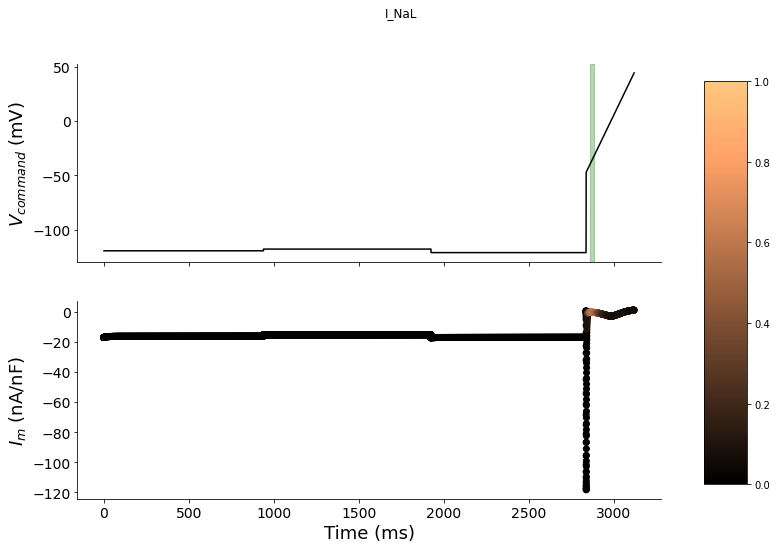

      Current  Contribution  Time Start  Time End
0        I_Na      0.821754      2840.0    2850.0
1       I_NaL      0.598622      2870.0    2880.0
2        I_To      0.015480      3015.0    3025.0
3       I_CaL      0.694064      2980.0    2990.0
4      I_CaNa      0.079894      3025.0    3035.0
5       I_CaK      0.065320      3075.0    3085.0
6        I_Kr      0.268014      3105.0    3115.0
7        I_Ks      0.043656      3110.0    3120.0
8        I_K1      0.992191      1925.0    1935.0
9      I_NaCa      0.070246      3110.0    3120.0
10  I_NaCa_ss      0.104105      2905.0    2915.0
11      I_NaK      0.116241      2870.0    2880.0
12       I_Kb      0.207754      3110.0    3120.0
13      I_Nab      0.009730      2860.0    2870.0
14      I_Cab      0.009298      2860.0    2870.0
15      I_pCa      0.000098      3110.0    3120.0
----------------------------------------------------------------------------------------------------
=====Complete==============================


In [4]:
if __name__ == '__main__':
    trial_conditions = "ORD2011_360_51_4_-121_61_10_5"
    plot_current_conributions(trial_conditions, prestep=2000, window=10, step_size=5, with_artefact=False)  
    print("=====Complete==============================")